In [6]:
pip uninstall elpigraph-python -y

Found existing installation: elpigraph-python 0.1.0
Uninstalling elpigraph-python-0.1.0:
  Successfully uninstalled elpigraph-python-0.1.0
Note: you may need to restart the kernel to use updated packages.


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  494  points and  2  dimensions
BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

Nodes =  4 1|0||5	0.4484	5	4	0	0	0	0	0.1309	0.0772	0.7594	0.8581	0.0036	0.3139	1.5694	7.847	0
5 1|0||6	0.3795	6	5	1	0	0	0	0.104	0.0558	0.8087	0.8975	0.0035	0.272	1.6319	9.7913	0
6 1|0||7	0.3409	7	6	2	0	0	0	0.0829	0.0541	0.8476	0.9006	0.0032	0.2548	1.7833	12.4832	0
7 1|0||8	0.3136	8	7	3	0	0	0	0.063	0.0383	0.8842	0.9295	0.0032	0.2474	1.9793	15.8344	0
8 1|1||9	0.2982	9	8	2	1	0	0	0.0503	0.0235	0.9076	0.9568	0.0036	0.2443	2.1985	19.7861	0
9 1|1||10	0.3228	10	9	3	1	0	0	0.0495	0.0305	0.909	0.944	0.0037	0.2696	2.6962	26.9621	0
10 1|1||11	0.3153	11	10	4	1	0	0	0.0478	0.0314	0.9121	0.942

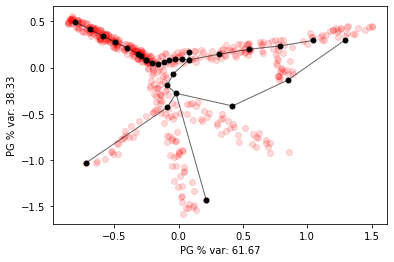

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import elpigraph

X = np.genfromtxt('data/tree_data.csv', delimiter=',')[:,:2]
X = np.concatenate(([[1.2,0],
                     [1,1]],
                    X))
#epg=elpigraph.computeElasticPrincipalTree(X,30)
epg1=elpigraph.computeElasticPrincipalTree(X,30,FixNodesAtPoints=[[0],[1]],StoreGraphEvolution=1,Do_PCA=False,Lambda=.001,verbose=1,
                                           FinalEnergy='Penalized',
                                           alpha=0.01)
elpigraph.plot.PlotPG(X,epg1[0])

-0.04457182116493991

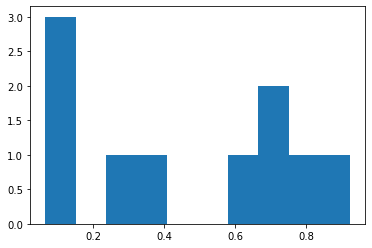

In [2]:
x=np.random.random((10))
plt.hist(x)
import scipy.stats as st
st.skew(x)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import elpigraph

X = np.genfromtxt('data/tree_data.csv', delimiter=',')[:,:2]
X = np.concatenate(([[1.2,0]],X))
#epg=elpigraph.computeElasticPrincipalTree(X,30)
epg1=elpigraph.computeElasticPrincipalTree(X,30,StoreGraphEvolution=1,Do_PCA=False,verbose=1)

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  493  points and  2  dimensions
BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

Nodes =  2 0||3	0.2129	3	2	1	0	0	0	0.173	0.1458	0.6801	0.7305	0.0129	0.027	0.0811	0.2434	0
3 1||4	0.1174	4	3	0	1	0	0	0.0977	0.0686	0.8193	0.8732	0.0174	0.0022	0.0087	0.035	0
4 1||5	0.0983	5	4	1	1	0	0	0.0804	0.0568	0.8513	0.8949	0.0163	0.0016	0.0081	0.0405	0
5 1||6	0.0805	6	5	2	1	0	0	0.0623	0.0437	0.8848	0.9191	0.0161	0.0021	0.0127	0.076	0
6 1||7	0.0709	7	6	3	1	0	0	0.0535	0.0382	0.9011	0.9294	0.0157	0.0017	0.0118	0.0823	0
7 2||8	0.062	8	7	2	2	0	0	0.0443	0.0299	0.9181	0.9447	0.0171	0.0006	0.0049	0.0394	0
8 2||9	0.0526	9	8	3	2	0	0	0.0366	0.0254	0.9323	0.953	0.015	0.001	0.0094	0.0

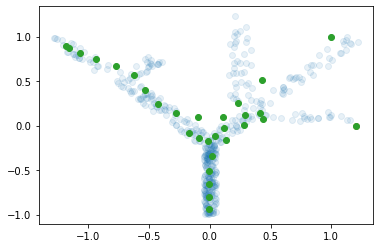

In [9]:
plt.scatter(*X.T[:2],alpha=.1)
plt.scatter(*X.T[:2,:1],alpha=.5)
plt.scatter(*epg1[0]['NodePositions'].T[:2])

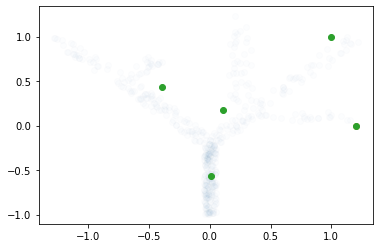

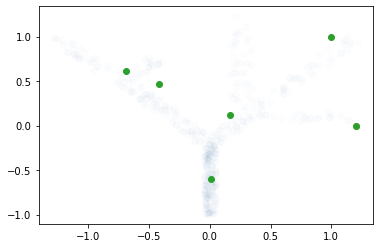

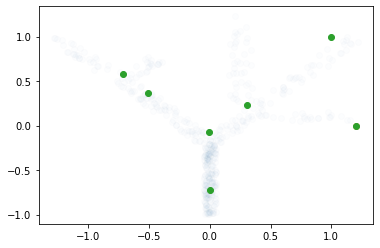

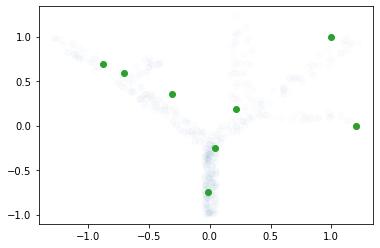

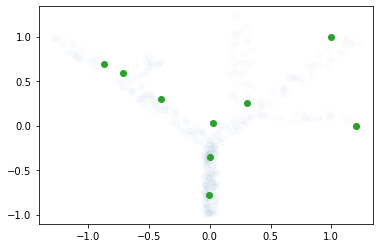

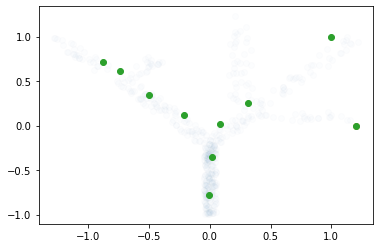

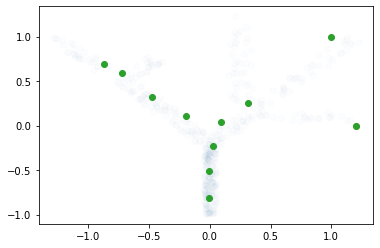

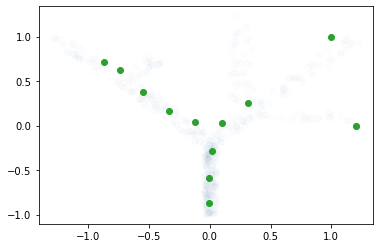

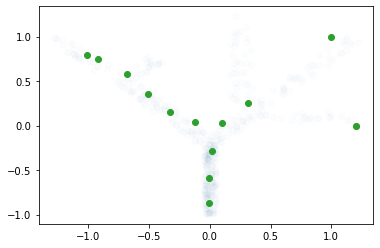

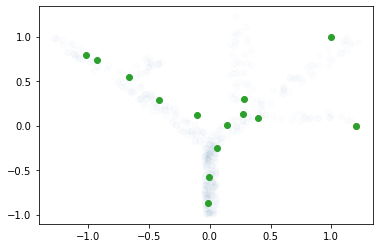

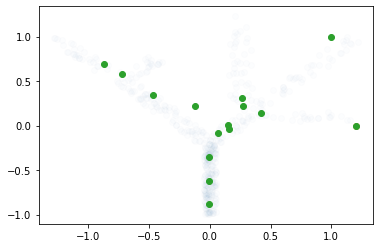

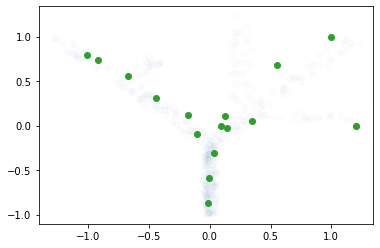

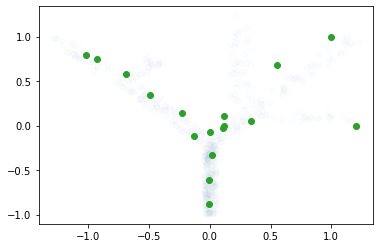

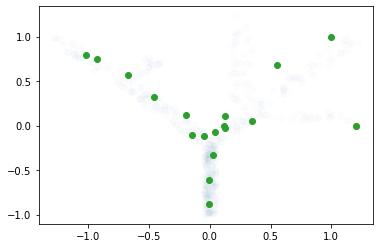

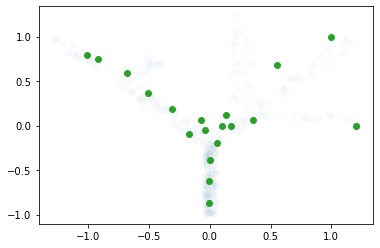

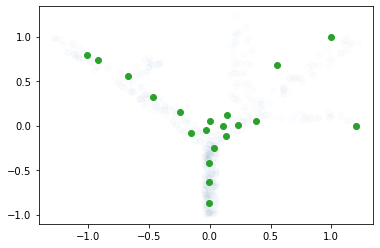

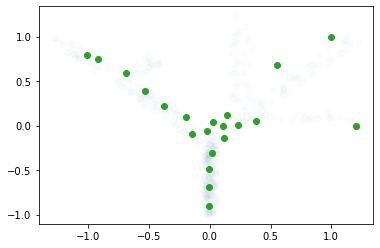

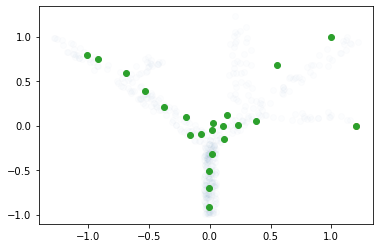

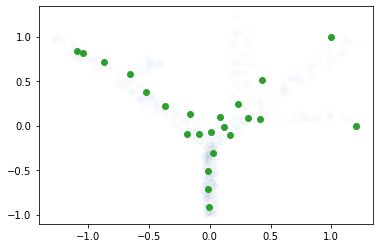

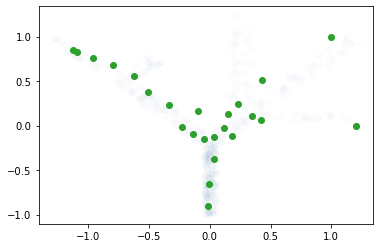

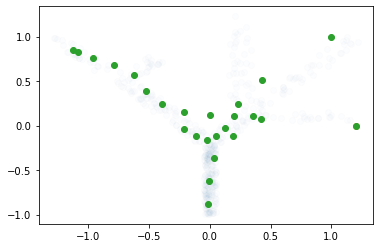

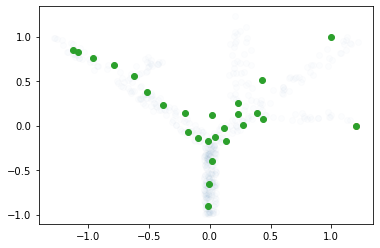

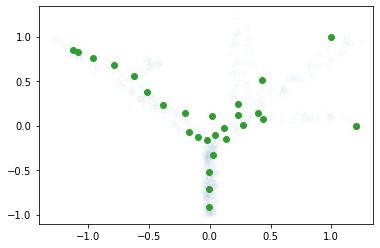

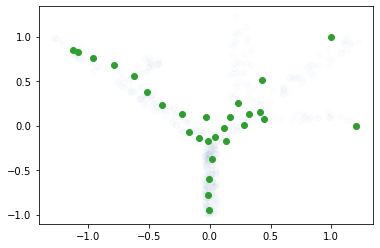

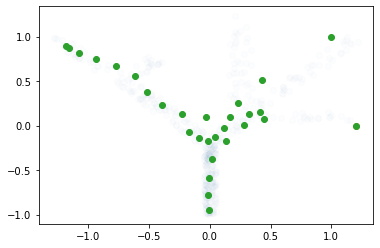

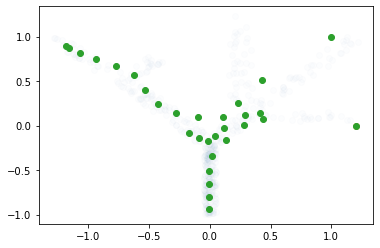

In [12]:
for k,v in epg1[0]['AllNodePositions'].items():
    plt.scatter(*X.T[:2],alpha=.01)
    plt.scatter(*X.T[:2,:1],alpha=.5)
    plt.scatter(*v.T[:2])
    plt.show()

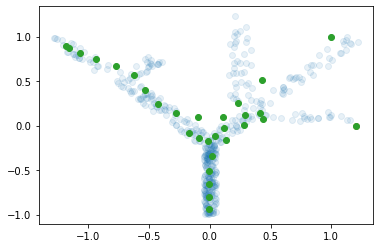

In [9]:
plt.scatter(*X.T[:2],alpha=.1)
plt.scatter(*X.T[:2,:1],alpha=.5)
plt.scatter(*epg1[0]['AllNodePositions'].T[:2])

In [53]:
X = np.genfromtxt('data/tree_data.csv', delimiter=',')[:,:2]
#X = np.concatenate((np.zeros(25)[None],np.linspace(-1,1,25)[None]),axis=0).T

PointWeights=np.ones(len(X))[None].T
NodePositions=np.array([[-1, 0],
                        [0, -1],
                        [1, 1],
                        [1, .5]])
Edges = np.array([[0,1],
                  [1,2],
                  [2,3],
                  [3,4]])

SquaredX=np.sum(X**2,axis=1,keepdims=1)
FixNodesAtPoints=[[0, 1, 2, 3, 4, 5],[-1,-2,-3,-4,-5]]
#FixNodesAtPoints=[np.arange(20)]
flat_FixNodesAtPoints = [item for sublist in FixNodesAtPoints for item in sublist] #fixed datapoints
if len(set(flat_FixNodesAtPoints)) != len(flat_FixNodesAtPoints):
    raise ValueError('FixNodesAtPoints lists contain duplicate points')
    
FixedNodePositions = np.array([X[inds].mean(axis=0) for inds in FixNodesAtPoints]) #init fixed nodes 
NodePositions=np.concatenate((FixedNodePositions,NodePositions))

Edges = np.concatenate(([[0,1]],Edges+len(FixNodesAtPoints)))
SpringLaplacianMatrix = elpigraph.src.core.MakeUniformElasticMatrix(Edges,.1,1)

In [55]:
    FixedNodeDists = [elpigraph.src.core.PartitionData(X[idx_points],NodePositions[i],SquaredX=SquaredX[idx_points],MaxBlockSize=1000000)[1]
                for i, idx_points in enumerate(FixNodesAtPoints)]

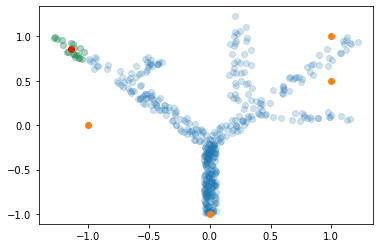

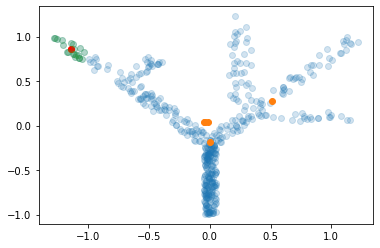

In [31]:
keep = [i for i in range(len(X)) if i not in flat_FixNodesAtPoints] #fitted datapoints

#fitted subset
X_move, SquaredX_move, PointWeights_move = X[keep], SquaredX[keep], PointWeights[keep]
NodePositions_move = NodePositions[len(FixNodesAtPoints):]
SpringLaplacianMatrix_move = SpringLaplacianMatrix[len(FixNodesAtPoints):,len(FixNodesAtPoints):]

partition, dists = elpigraph.src.core.PartitionData(X_move,NodePositions,SquaredX=SquaredX_move,MaxBlockSize=1000000)
NewNodePositions = elpigraph.src.distutils.FitGraph2DataGivenPartition(X_move, PointWeights_move, SpringLaplacianMatrix_move,partition)
NewNodePositions = np.concatenate(
    (
        NodePositions[:len(FixNodesAtPoints)], #fixed node positions
        NewNodePositions #fitted nodes
    ))

plt.scatter(*X.T[:2],alpha=.2)
plt.scatter(*NodePositions.T[:2])
plt.scatter(*FixedNodePositions.T,c='r')
plt.scatter(*X[:20].T,alpha=.2);plt.show()

plt.scatter(*X.T[:2],alpha=.2)
plt.scatter(*NewNodePositions.T[:2])
plt.scatter(*FixedNodePositions.T,c='r')
plt.scatter(*X[:20].T,alpha=.2);plt.show()

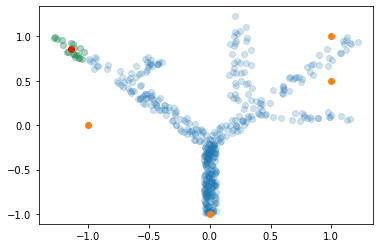

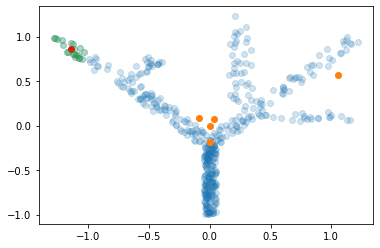

In [29]:
keep = [i for i in range(len(X)) if i not in flat_FixNodesAtPoints] #fitted datapoints

#fitted subset
X_move, SquaredX_move, PointWeights_move = X[keep], SquaredX[keep], PointWeights[keep]
NodePositions_move = NodePositions[len(FixNodesAtPoints):]
SpringLaplacianMatrix_move = SpringLaplacianMatrix[len(FixNodesAtPoints):,len(FixNodesAtPoints):]

partition, dists = elpigraph.src.core.PartitionData(X_move,NodePositions_move,SquaredX=SquaredX_move,MaxBlockSize=1000000)
NewNodePositions = elpigraph.src.distutils.FitGraph2DataGivenPartition(X_move, PointWeights_move, SpringLaplacianMatrix_move,partition)

plt.scatter(*X.T[:2],alpha=.2)
plt.scatter(*NodePositions.T[:2])
plt.scatter(*FixedNodePositions.T,c='r')
plt.scatter(*X[:20].T,alpha=.2);plt.show()

plt.scatter(*X.T[:2],alpha=.2)
plt.scatter(*NewNodePositions.T[:2])
plt.scatter(*FixedNodePositions.T,c='r')
plt.scatter(*X[:20].T,alpha=.2);plt.show()